In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

In [121]:
import seaborn as sns

In [200]:
data_gpp = pd.read_csv("C:/Users/icoddington/OneDrive - World Justice Project/EU Subnational/EU-S Data/reports/eu-thematic-reports/data-viz/output/data4web_gpp.csv")
data_qrq = pd.read_csv("C:/Users/icoddington/OneDrive - World Justice Project/EU Subnational/EU-S Data/reports/eu-thematic-reports/data-viz/output/data4web_qrq.csv")
variance = pd.read_csv("C:/Users/icoddington/OneDrive - World Justice Project/EU Subnational/EU-S Data/reports/eu-thematic-reports/data-viz/output/variance_analysis.csv")
economic_dev = pd.read_excel("C:/Users/icoddington/Downloads/GPP_QRQ_TPS database.xlsx", sheet_name = 'Sheet 1')
master_gpp_country = pd.read_csv("C:/Users/icoddington/DOwnloads/master_gpp_country.csv")
fintight = pd.read_csv("C:/Users/icoddington/DOwnloads/fintight_national.csv")




In [201]:
# join santi's data w/ qrq
cols = ['DEV_FINAL_DEVCAT', 'nuts_id']
economic_dev = economic_dev[cols]
economic_dev = pd.merge(economic_dev, data_qrq, on = 'nuts_id')

In [202]:
economic_dev

,DEV_FINAL_DEVCAT,nuts_id,country,level,nuts_ltn,theme,pillar,pillar_name,pillar_id,subpillar,subpillar_name,indicator,score
0,more developed,AT1,Austria,regional,East Austria,Democracy & Fundamental Rights,1,Checks on Government Powers,1,1.01,Legislative oversight,p_1_01,0.654640
1,more developed,AT1,Austria,regional,East Austria,Democracy & Fundamental Rights,1,Checks on Government Powers,1,1.02,Judicial independence,p_1_02,0.769023
2,more developed,AT1,Austria,regional,East Austria,Democracy & Fundamental Rights,1,Checks on Government Powers,1,1.03,Independent oversight,p_1_03,0.653182
3,more developed,AT1,Austria,regional,East Austria,Democracy & Fundamental Rights,1,Checks on Government Powers,1,1.04,Independent prosecution,p_1_04,0.674055
4,more developed,AT1,Austria,regional,East Austria,Democracy & Fundamental Rights,1,Checks on Government Powers,1,1.05,"Free, fair, and secure elections",p_1_05,0.837992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5385,more developed,SE3,Sweden,regional,Northern Sweden,Transparency & Corruption,8,Control of Corruption,8,8.50,Absence of corrupt electoral practices,p_8_5,NaN
5386,more developed,SE3,Sweden,regional,Northern Sweden,Transparency & Corruption,9,Transparency,9,9.10,Transparency and access to information,p_9_1,NaN
5387,more developed,SE3,Sweden,regional,Northern Sweden,Transparency & Corruption,10,"Administrative proceedings, regulatory enforce...",10,10.10,"Simple, predictable, and timely administrative...",p_10_1,NaN
5388,more developed,SE3,Sweden,regional,Northern Sweden,Transparency & Corruption,10,"Administrative proceedings, regulatory enforce...",10,10.20,Right to property,p_10_2,NaN


In [207]:
print(economic_dev['pillar'].unique())

[ 1  2  3  4  5  6  8  9 10]


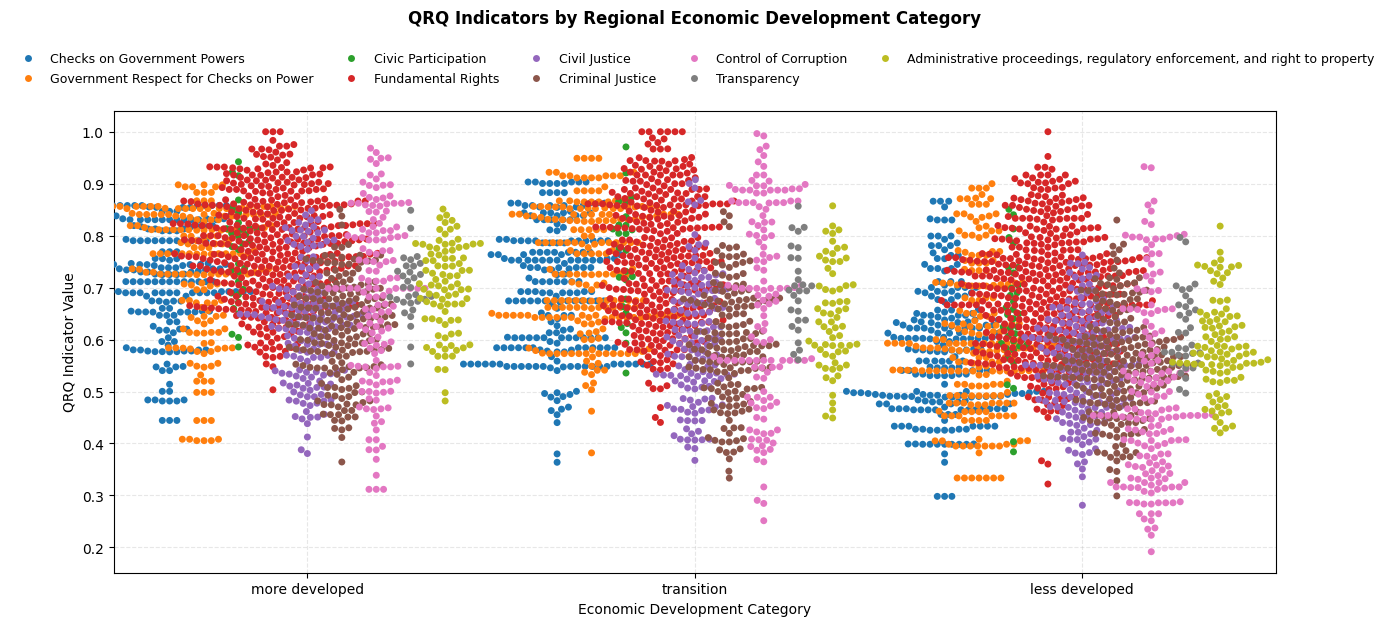

In [210]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(15, 6))
sns.swarmplot(data=economic_dev, x="DEV_FINAL_DEVCAT", y="score", hue="pillar_name", dodge=True)


plt.title("")
plt.xlabel("Economic Development Category")
plt.ylabel("QRQ Indicator Value")
plt.text(0.5, 1.2, 'QRQ Indicators by Regional Economic Development Category', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, fontweight='bold')
plt.legend(title = None, loc = 'upper center', bbox_to_anchor = (0.5, 1.15), ncol = 5, frameon = False, fontsize = 9)
plt.grid(True, linestyle="--", alpha=0.3)

plt.show()


C:\Users\icoddington\AppData\Local\Temp\ipykernel_25004\2668754502.py:7: FutureWarning:



The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.

C:\Users\icoddington\AppData\Local\Temp\ipykernel_25004\2668754502.py:11: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.




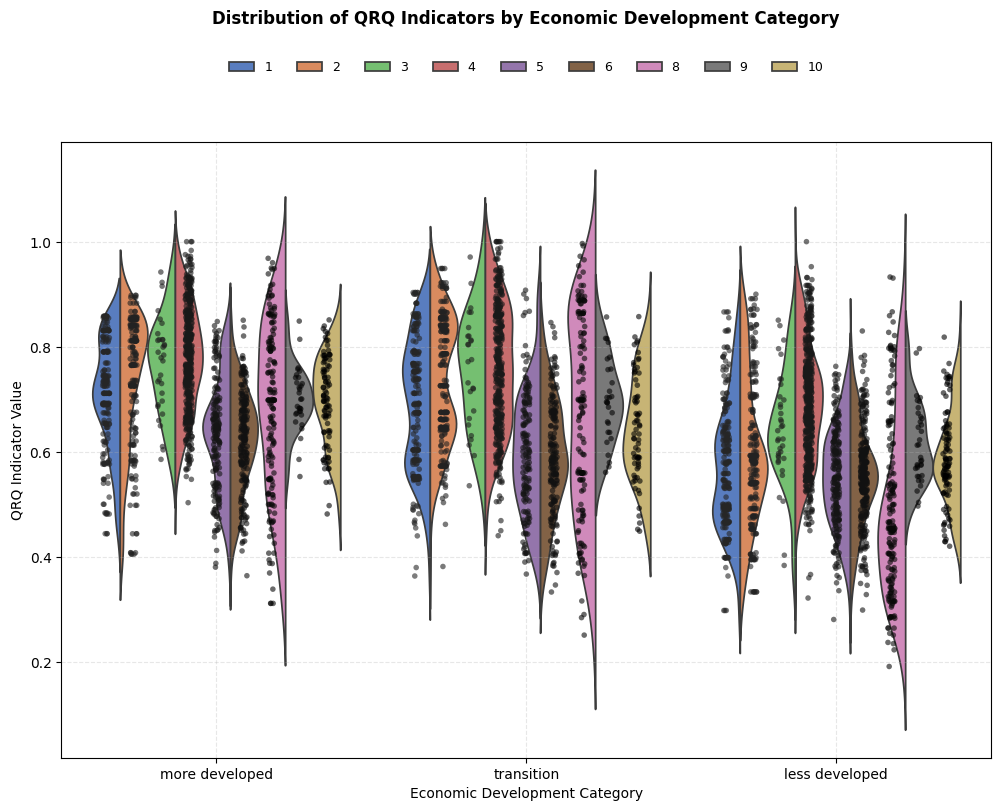

In [198]:
# visualization two. violin plot of qrq scores by pillar and economic development stage overlayed with scatter distribution. 

plt.figure(figsize=(12, 8))


# violin plot
sns.violinplot(data=economic_dev, x="DEV_FINAL_DEVCAT", y="score", hue="pillar", 
               split=True, inner=None, palette="muted", scale="width")

# scatterplot
sns.stripplot(data=economic_dev, x="DEV_FINAL_DEVCAT", y="score", hue="pillar", 
              dodge=True, jitter=True, color="black", marker="o", alpha=0.6, size=4, legend = False)

# aesthetics
plt.title("")
plt.xlabel("Economic Development Category")
plt.ylabel("QRQ Indicator Value")
plt.legend(title="Pillar", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.3)
plt.text(0.5, 1.2, 'Distribution of QRQ Indicators by Economic Development Category', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, fontweight='bold')
plt.legend(title = None, loc = 'upper center', bbox_to_anchor = (0.5, 1.15), ncol = 10, frameon = False, fontsize = 9)


plt.show()


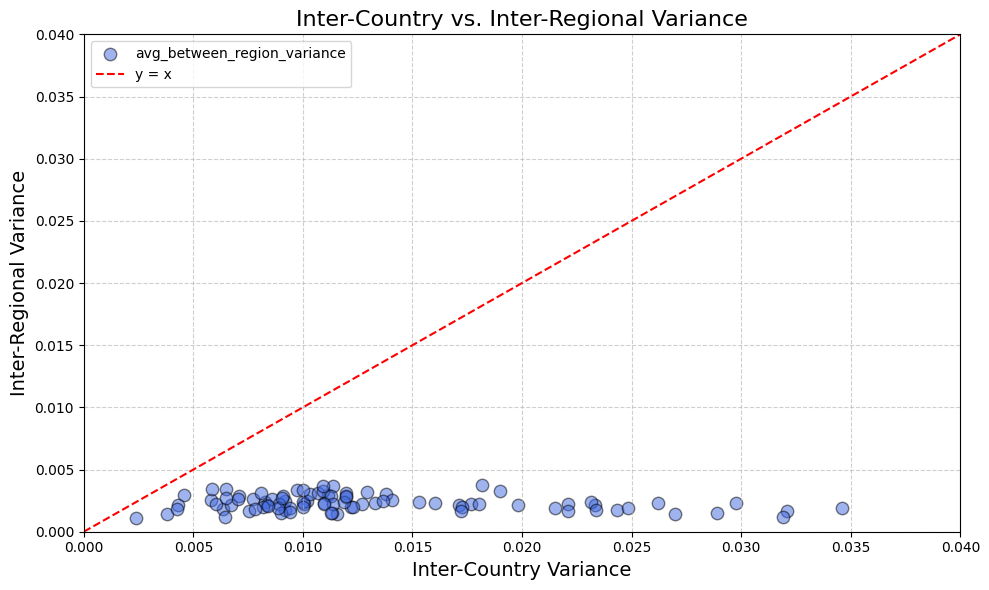

In [93]:
# visualization three. scatterplot of between region variance vs between country variance for all indicators
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10, 6))


plt.scatter(
    x="between_countries_var", 
    y="avg_between_region_variance", 
    data=variance,
    color="royalblue", 
    alpha=0.5, 
    edgecolor="k", 
    s=80  # Size of markers
)

# Add y = x line
plt.plot([0, 0.04], [0, 0.04], 'r--', linewidth=1.5, label="y = x")

plt.xlim(0, 0.04)
plt.ylim(0, 0.04)

plt.xlabel('Inter-Country Variance', fontsize=14)
plt.ylabel('Inter-Regional Variance', fontsize=14)
plt.title('Inter-Country vs. Inter-Regional Variance', fontsize=16)

plt.grid(True, linestyle="--", alpha=0.6)

plt.legend(loc="upper left")

plt.tight_layout()
plt.show()


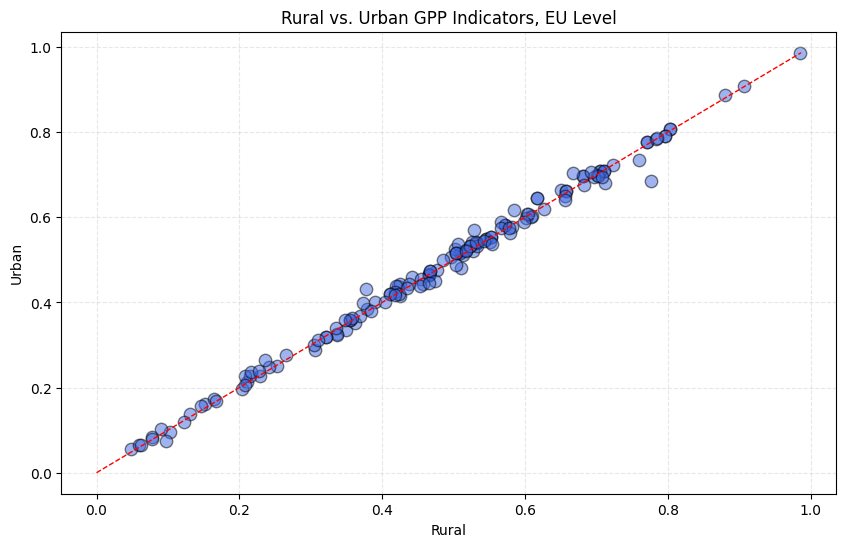

In [211]:
rural_vs_urban_eu = data_gpp.loc[
    (data_gpp['demographic'].isin(['Rural', 'Urban'])) &
    (data_gpp['level'] == 'eu')
]

# there are multiple rural / urban scores per id. 
pivoted_data = rural_vs_urban_eu.pivot(index=['id', 'section'], columns='demographic', values='value').reset_index()

# Scatter plot of Rural vs Urban scores
plt.figure(figsize=(10, 6))
plt.scatter(
    x="Rural", 
    y="Urban", 
    data=pivoted_data,
    color="royalblue", 
    alpha=0.5, 
    edgecolor="k", 
    s=80  # Size of markers
)

# Add a 45-degree reference line for comparison
max_score = max(pivoted_data['Rural'].max(), pivoted_data['Urban'].max())
plt.plot([0, max_score], [0, max_score], color='red', linestyle='--', linewidth=1)

# Adding labels and title
plt.title("Rural vs. Urban GPP Indicators, EU Level")
plt.xlabel("Rural")
plt.ylabel("Urban")
plt.grid(True, linestyle="--", alpha=0.3)

plt.show()


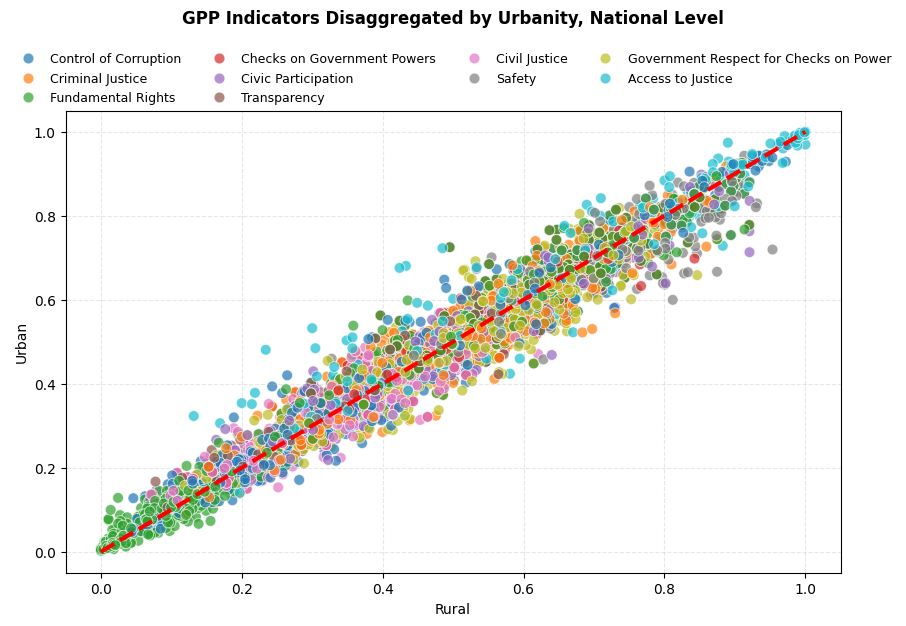

In [212]:
rural_vs_urban_national = data_gpp.loc[
    (data_gpp['demographic'].isin(['Rural', 'Urban'])) &
    (data_gpp['level'] == 'national')
]

pivoted_data = rural_vs_urban_national.pivot(index=['nuts_id','id', 'section'], columns='demographic', values='value').reset_index()

# make the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Rural', 
    y='Urban', 
    data=pivoted_data, 
    hue='section',  # Use 'section' for the color
    s=60,  # Size of points
    alpha=0.7,  # Transparency for points
)


# reference line
max_score = max(pivoted_data['Rural'].max(), pivoted_data['Urban'].max())
plt.plot([0, max_score], [0, max_score], color='red', linestyle='--', linewidth=3)


# aesthetics
plt.title("")
plt.xlabel("Rural")
plt.ylabel("Urban")
plt.grid(True, linestyle="--", alpha=0.3)
plt.text(0.5, 1.2, 'GPP Indicators Disaggregated by Urbanity, National Level', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, fontweight='bold')
plt.legend(title = None, loc = 'upper center', bbox_to_anchor = (0.5, 1.15), ncol = 4, frameon = False, fontsize = 9)


plt.show()


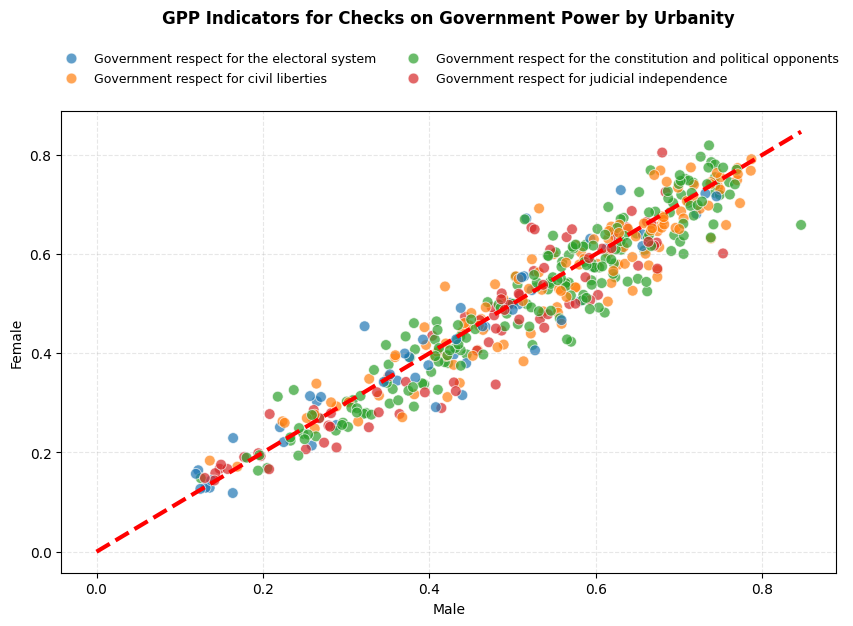

In [215]:
# filter by least difference at national level
# filter by significant differences (topics)
urban_signif = rural_vs_urban_national.loc[
    (rural_vs_urban_national['section'].isin(['Government Respect for Checks on Power']))
]

pivoted_data = urban_signif.pivot(index=['nuts_id','id', 'subsection'], columns='demographic', values='value').reset_index()

plt.figure(figsize=(10, 6))

sns.scatterplot(
    x='Rural', 
    y='Urban', 
    data=pivoted_data, 
    hue='subsection', 
    s=60,  
    alpha=0.7,  
)
# Add a 45-degree reference line for comparison
max_score = max(pivoted_data['Rural'].max(), pivoted_data['Urban'].max())
plt.plot([0, max_score], [0, max_score], color='red', linestyle='--', linewidth=3)

# Adding labels and title
plt.title("")
plt.xlabel("Male")
plt.ylabel("Female")
plt.text(0.5, 1.2, 'GPP Indicators for Checks on Government Power by Urbanity', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, fontweight='bold')
plt.legend(title = None, loc = 'upper center', bbox_to_anchor = (0.5, 1.15), ncol = 2, frameon = False, fontsize = 9)
plt.grid(True, linestyle="--", alpha=0.3)


plt.show()


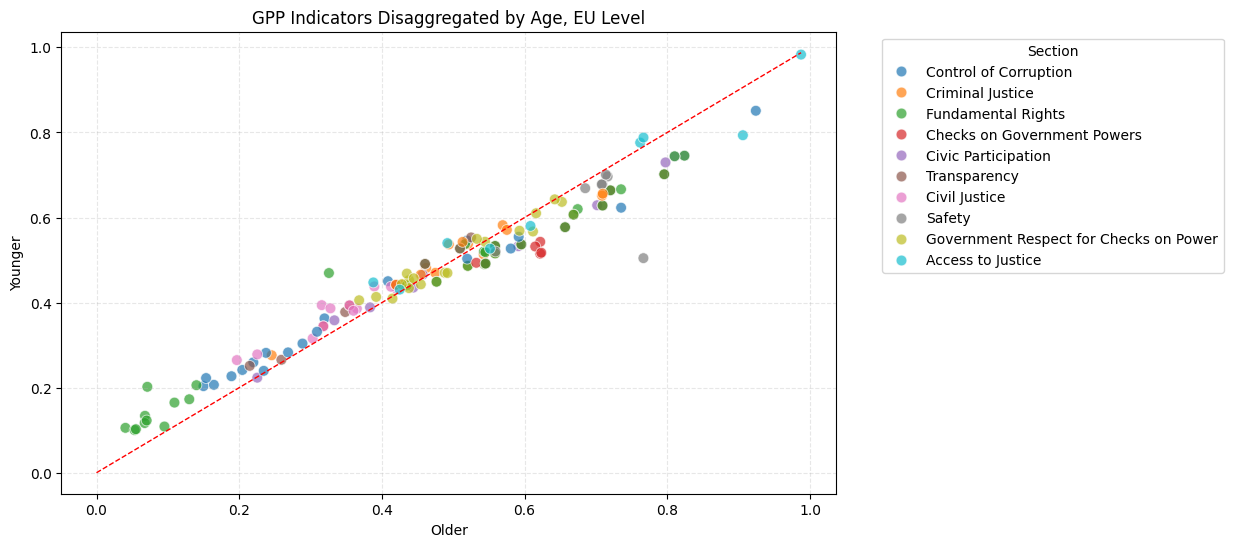

In [179]:
# age
# Filter and create a copy to avoid SettingWithCopyWarning
age_eu = data_gpp.loc[
    (data_gpp['demographic'].isin(["18-24", "25-34", "35-44", "45-54", "55-64", "+65"])) &
    (data_gpp['level'] == 'eu')
].copy()  # Use .copy() to avoid chained assignment issues

# Safely add the 'young' column with .loc
age_eu.loc[:, 'young'] = age_eu['demographic'].isin(['18-24', '25-34'])


# Aggregate to remove duplicates by averaging
age_eu_agg = age_eu.groupby(['nuts_id', 'id', 'section', 'young'])['value'].mean().reset_index()

# Now pivot without duplicates
pivoted_data = age_eu_agg.pivot(index=['nuts_id', 'id', 'section'], columns='young', values='value').reset_index()
pivoted_data.columns = ['nuts_id', 'id', 'section', 'Older', 'Younger']

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Older', 
    y='Younger', 
    data=pivoted_data, 
    hue='section',  # Use 'section' for the color
    s=60,  # Size of points
    alpha=0.7,  # Transparency for points
)


# reference line
max_score = max(pivoted_data['Older'].max(), pivoted_data['Younger'].max())
plt.plot([0, max_score], [0, max_score], color='red', linestyle='--', linewidth=1)


# aesthetics
plt.title("")
plt.xlabel("Older")
plt.ylabel("Younger")
plt.grid(True, linestyle="--", alpha=0.3)
plt.text(0.5, 1.2, 'GPP Indicators Disaggregated by Age, EU Level', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, fontweight='bold')
plt.legend(title = None, loc = 'upper center', bbox_to_anchor = (0.5, 1.15), ncol = 4, frameon = False, fontsize = 9)

plt.show()

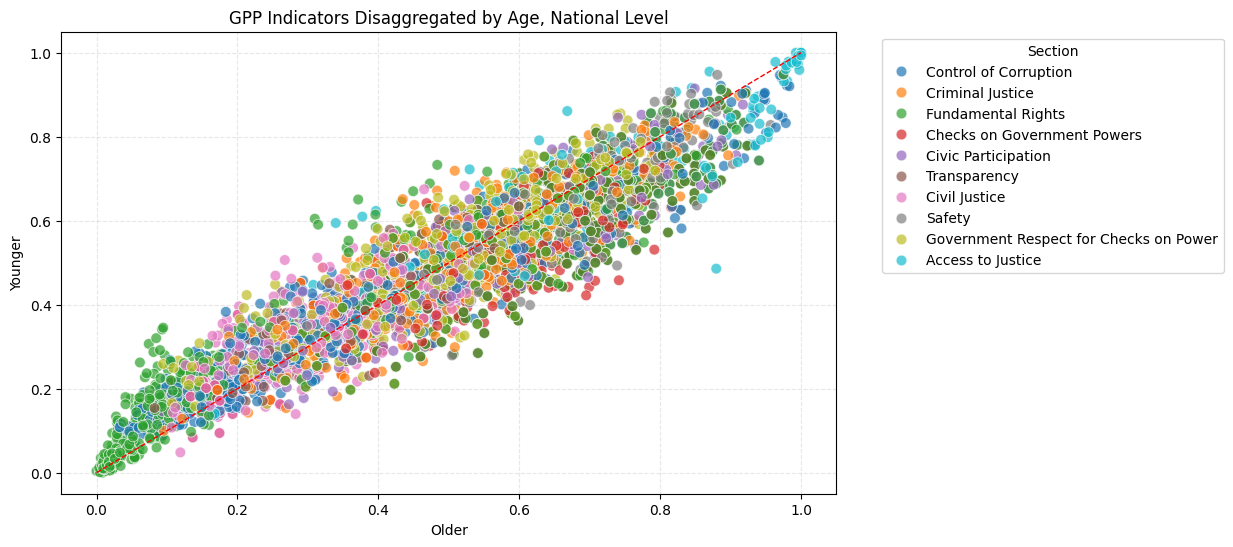

In [114]:
# Filter and create a copy to avoid SettingWithCopyWarning
age_national = data_gpp.loc[
    (data_gpp['demographic'].isin(["18-24", "25-34", "35-44", "45-54", "55-64", "+65"])) &
    (data_gpp['level'] == 'national')
].copy()  

# Safely add the 'young' column with .loc
age_national.loc[:, 'young'] = age_national['demographic'].isin(['18-24', '25-34'])


# Aggregate to remove duplicates by averaging
age_national_agg = age_national.groupby(['nuts_id', 'id', 'section', 'young'])['value'].mean().reset_index()

# Now pivot without duplicates
pivoted_data = age_national_agg.pivot(index=['nuts_id', 'id', 'section'], columns='young', values='value').reset_index()
pivoted_data.columns = ['nuts_id', 'id', 'section', 'Older', 'Younger']

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Older', 
    y='Younger', 
    data=pivoted_data, 
    hue='section',  # Use 'section' for the color
    s=60,  # Size of points
    alpha=0.7,  # Transparency for points
)


# reference line
max_score = max(pivoted_data['Older'].max(), pivoted_data['Younger'].max())
plt.plot([0, max_score], [0, max_score], color='red', linestyle='--', linewidth=1)


# aesthetics
plt.title("")
plt.xlabel("Older")
plt.ylabel("Younger")
plt.grid(True, linestyle="--", alpha=0.3)
plt.text(0.5, 1.2, 'GPP Indicators Disaggregated by Age, National Level', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, fontweight='bold')
plt.legend(title = None, loc = 'upper center', bbox_to_anchor = (0.5, 1.15), ncol = 4, frameon = False, fontsize = 9)



plt.show()

In [177]:
# filter by significant differences (topics)
age_national_agg = age_national.groupby(['nuts_id', 'id', 'subsection', 'young'])['value'].mean().reset_index()

age_signif = age_national_agg.loc[
    (age_national['section'].isin(['Checks on Government Power' ]))
]

pivoted_data = age_national_agg.pivot(index=['nuts_id', 'id', 'subsection'], columns='young', values='value').reset_index()
pivoted_data.columns = ['nuts_id', 'id', 'section', 'Older', 'Younger']

# Scatter plot of Rural vs Urban scores
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x='Older', 
    y='Younger', 
    data=pivoted_data, 
    hue='subsection',  # Use 'section' for the color
    s=60,  # Size of points
    alpha=0.7,  # Transparency for points
)
# Add a 45-degree reference line for comparison
max_score = max(pivoted_data['Older'].max(), pivoted_data['Younger'].max())
plt.plot([0, max_score], [0, max_score], color='red', linestyle='--', linewidth=1)

# Adding labels and title
plt.title("GPP Indicators for Checks on Govt Power Disagreggated by Age")
plt.xlabel("Older")
plt.ylabel("Younger")
plt.show()

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

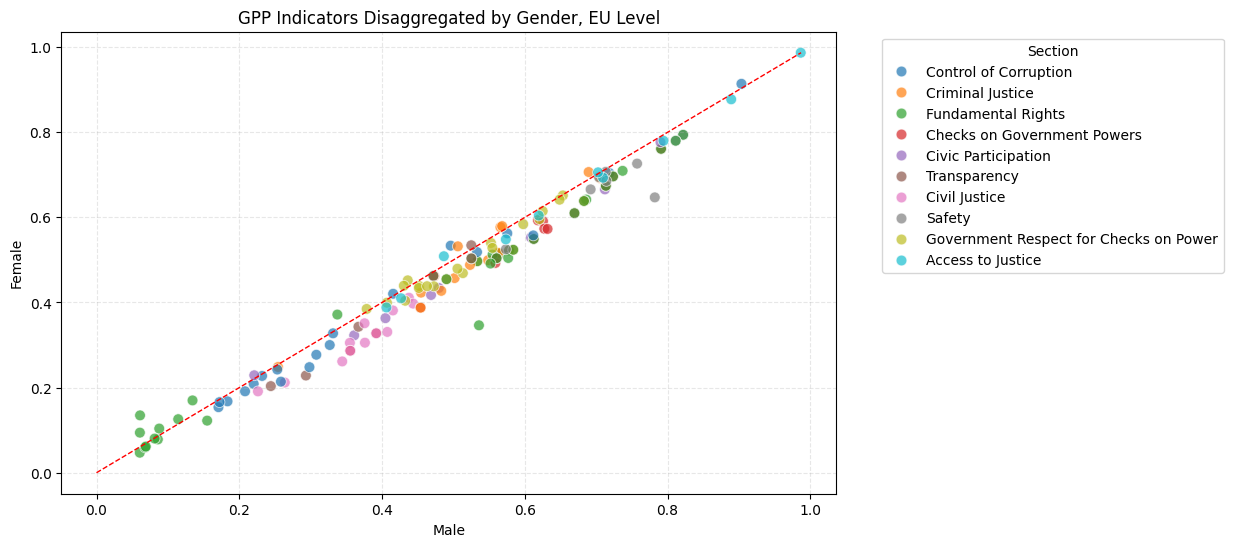

In [178]:
# gender
gender_eu = data_gpp.loc[
    (data_gpp['demographic'].isin(['Male', 'Female'])) &
    (data_gpp['level'] == 'eu')
]

pivoted_data = gender_eu.pivot(index=['id', 'section'], columns='demographic', values='value').reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Male', 
    y='Female', 
    data=pivoted_data, 
    hue='section',  # Use 'section' for the color
    s=60,  # Size of points
    alpha=0.7,  # Transparency for points
)


# reference line
max_score = max(pivoted_data['Male'].max(), pivoted_data['Female'].max())
plt.plot([0, max_score], [0, max_score], color='red', linestyle='--', linewidth=1)


# aesthetics
plt.title("GPP Indicators Disaggregated by Gender, EU Level")
plt.xlabel("Male")
plt.ylabel("Female")
plt.grid(True, linestyle="--", alpha=0.3)
plt.legend(title='Section', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show()

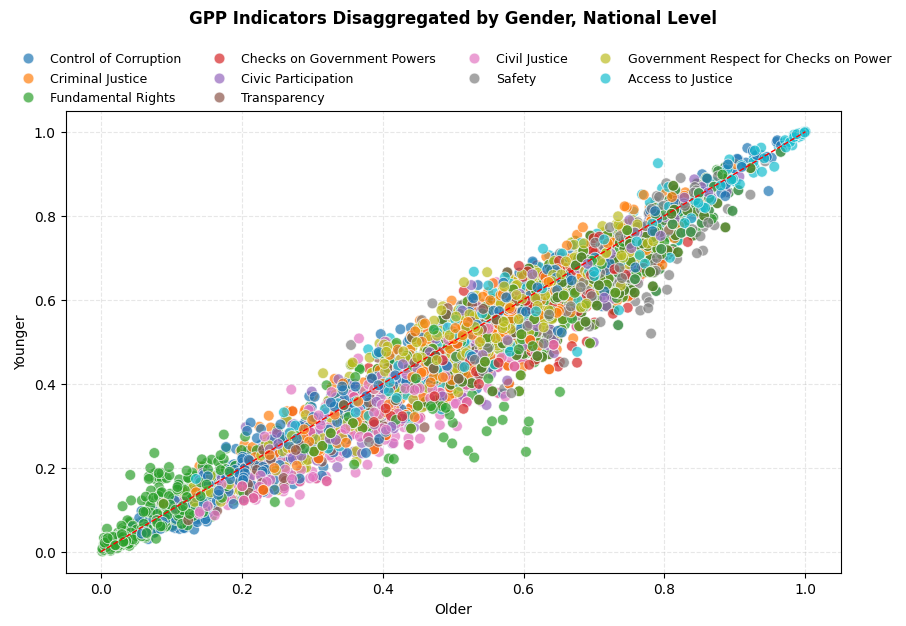

In [192]:
gender_national = data_gpp.loc[
    (data_gpp['demographic'].isin(['Male', 'Female'])) &
    (data_gpp['level'] == 'national')
]

# there are multiple rural / urban scores per id. 
pivoted_data = gender_national.pivot(index=['nuts_id','id', 'section'], columns='demographic', values='value').reset_index()

# Scatter plot of Rural vs Urban scores
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Male', 
    y='Female', 
    data=pivoted_data, 
    hue='section',  # Use 'section' for the color
    s=60,  # Size of points
    alpha=0.7,  # Transparency for points
)


# reference line
max_score = max(pivoted_data['Male'].max(), pivoted_data['Female'].max())
plt.plot([0, max_score], [0, max_score], color='red', linestyle='--', linewidth=1)


# aesthetics
plt.title("")
plt.xlabel("Older")
plt.ylabel("Younger")
plt.grid(True, linestyle="--", alpha=0.3)
plt.text(0.5, 1.2, 'GPP Indicators Disaggregated by Gender, National Level', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, fontweight='bold')

plt.legend(title = None, loc = 'upper center', bbox_to_anchor = (0.5, 1.15), ncol = 4, frameon = False, fontsize = 9)


plt.show()

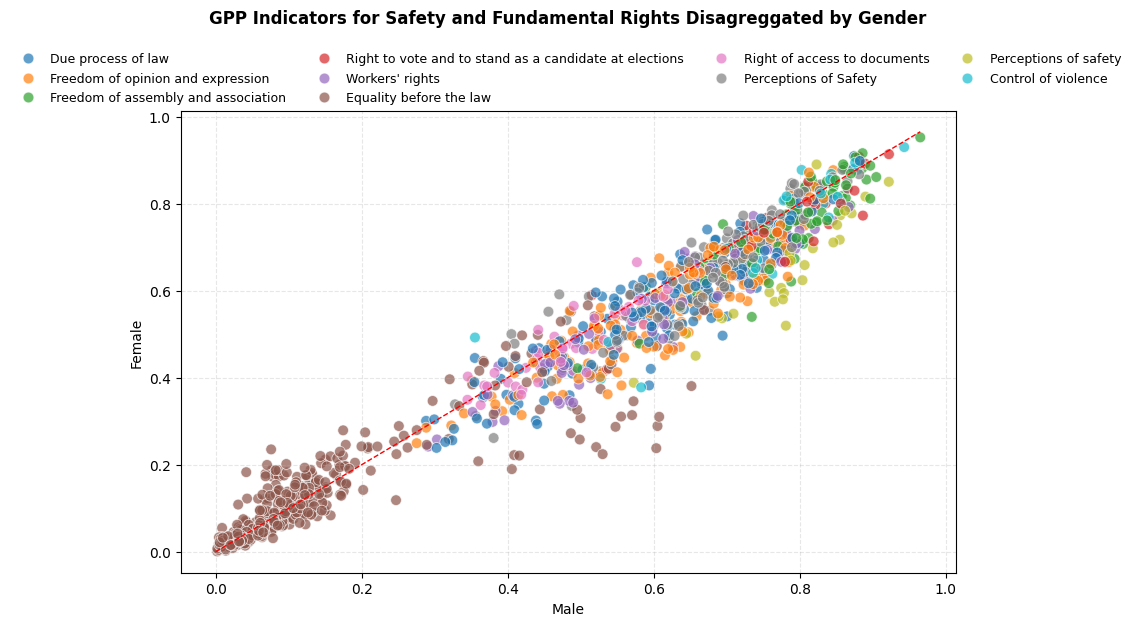

In [194]:
# filter by significant differences (topics)
gender_signif = gender_national.loc[
    (gender_national['section'].isin(['Safety', 'Fundamental Rights' ]))
]

# there are multiple rural / urban scores per id. 
pivoted_data = gender_signif.pivot(index=['nuts_id','id', 'subsection'], columns='demographic', values='value').reset_index()

# Scatter plot of Rural vs Urban scores
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x='Male', 
    y='Female', 
    data=pivoted_data, 
    hue='subsection', 
    s=60,  
    alpha=0.7,  
)
# Add a 45-degree reference line for comparison
max_score = max(pivoted_data['Male'].max(), pivoted_data['Female'].max())
plt.plot([0, max_score], [0, max_score], color='red', linestyle='--', linewidth=1)

# Adding labels and title
plt.title("")
plt.xlabel("Male")
plt.ylabel("Female")
plt.grid(True, linestyle="--", alpha=0.3)

plt.text(0.5, 1.2, 'GPP Indicators for Safety and Fundamental Rights Disagreggated by Gender', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, fontweight='bold')

plt.legend(title = None, loc = 'upper center', bbox_to_anchor = (0.5, 1.15), ncol = 4, frameon = False, fontsize = 9)
plt.show()

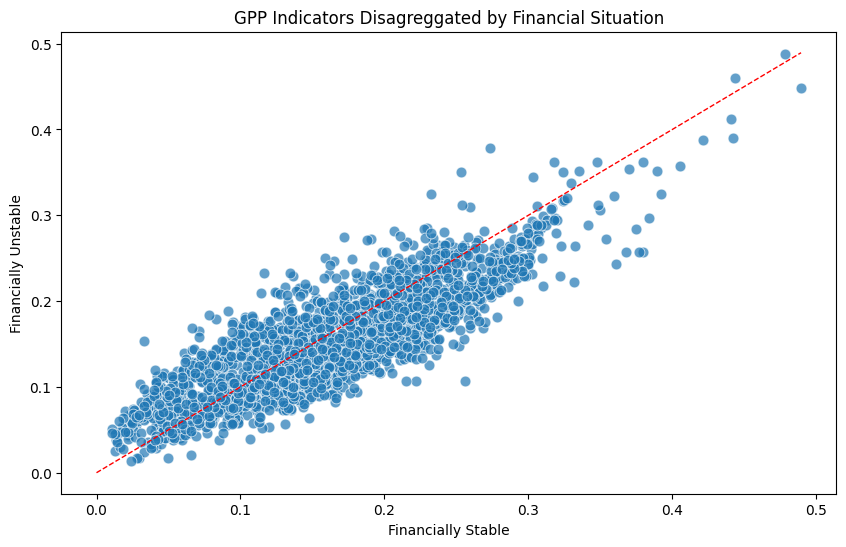

In [166]:
# fintight
fintight = fintight.dropna(subset=['fintight'])

long_data = fintight.melt(id_vars=['country_name_ltn', 'nuts_id', 'fintight'],
                      var_name='target', value_name='value')

# Step 2: Pivot to create separate columns for `fintight == 0` and `fintight == 1` values
pivoted_data = long_data.pivot_table(
    index=['country_name_ltn', 'nuts_id', 'target'],
    columns='fintight',
    values='value',
    aggfunc='first'  # Use 'first' in case there are no duplicates
).reset_index()

# Rename the columns for clarity
pivoted_data.columns = ['country_name_ltn', 'nuts_id', 'target', 'fintight_0_value', 'fintight_1_value']

plt.figure(figsize=(10, 6))

sns.scatterplot(
    x='fintight_0_value', 
    y='fintight_1_value', 
    data=pivoted_data,
    s=60,  # Size of points
    alpha=0.7,  # Transparency for points
)
# Add a 45-degree reference line for comparison
max_score = max(pivoted_data['fintight_0_value'].max(), pivoted_data['fintight_1_value'].max())
plt.plot([0, max_score], [0, max_score], color='red', linestyle='--', linewidth=1)

# Adding labels and title
plt.title("GPP Indicators Disagreggated by Financial Situation")
plt.xlabel("Financially Stable")
plt.ylabel("Financially Unstable")
plt.show()

In [167]:
# master gpp country
import plotly.graph_objects as go

# Sorting countries for cleaner visualization (optional)
data = master_gpp_country.sort_values(by='TRT_govt_national', ascending=True)

# Initialize the figure
fig = go.Figure()

# Define colors for the markers
color_local = '#D0DB97'  # Light color for Local
color_national = '#254D32'  # Dark color for National

# Add lines connecting the local and national values with conditional coloring
for i, row in data.iterrows():
    # Determine the line color based on which value is higher
    line_color = color_local if row['TRT_govt_local'] > row['TRT_govt_national'] else color_national
    
    fig.add_trace(go.Scatter(
        x=[row['TRT_govt_local'] * 100, row['TRT_govt_national'] * 100],
        y=[row['country_name_ltn'], row['country_name_ltn']],
        mode='lines',
        line=dict(color=line_color, width=2),
        showlegend=False
    ))

# Add markers for local values
fig.add_trace(go.Scatter(
    x=data['TRT_govt_local'] * 100,
    y=data['country_name_ltn'],
    mode='markers',
    marker=dict(color=color_local, size=8),
    name='Local'
))

# Add markers for national values
fig.add_trace(go.Scatter(
    x=data['TRT_govt_national'] * 100,
    y=data['country_name_ltn'],
    mode='markers',
    marker=dict(color=color_national, size=8),
    name='National'
))

# Customize layout
fig.update_layout(
    title='Most EU countries exhibit a higher trust in local authorities',
    xaxis_title='Percentage (%)',
    yaxis_title='',  
    plot_bgcolor='white',
    height=600,
    width=800,
    xaxis=dict(showgrid=True, gridcolor='lightgrey', gridwidth=1, range = [0,100]),  
    legend=dict(
        orientation="h",  
        yanchor="bottom",
        y=1.05,
        xanchor="left",
        x=0,
        title_text=None ,
        font = dict(size = 10) 
    ),
     annotations=[
        dict(
            x=0.5,
            y=1.05,  
            xref='paper',
            yref='paper',
            showarrow=False,
            text='Percentage of people who reported a lot or some trust in public officials working in the national and local goverment.',
            font=dict(size=9)
        )
    ]
)

fig.show()

 

